In [1]:

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bigdatamart_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

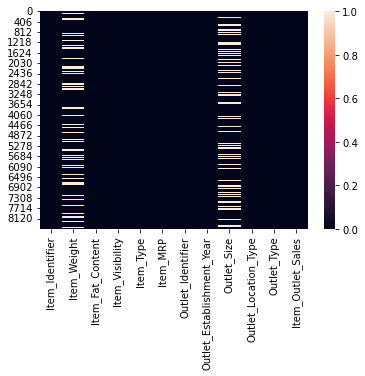

In [7]:
#Visualizing the null values clearly by plotting.
sns.heatmap(df.isnull())

In [8]:
numerical_features = [i for i in df if df[i].dtypes!='O']

In [9]:
year_feature = [i for i in numerical_features if 'Yr' in i or 'Year' in i]

In [10]:
year_feature

['Outlet_Establishment_Year']

Text(0, 0.5, 'Item_Outlet_Sales')

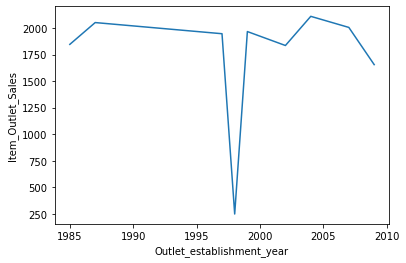

In [11]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot()
plt.xlabel('Outlet_establishment_year')
plt.ylabel('Item_Outlet_Sales')

Outlet established in the year 1998(approx) shows least sales.

In [13]:
categorical_features = [i for i in df if df[i].dtypes=='O']
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [14]:
for i in categorical_features:
    print(i)
    print(df[i].value_counts())
    print('-----------')

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
-----------
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
-----------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
-----------
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    

In [15]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

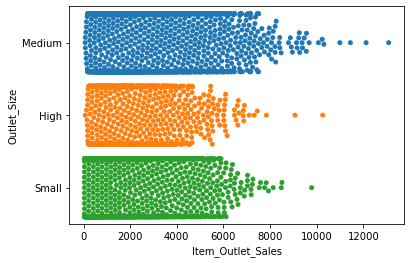

In [16]:
sns.swarmplot(x = 'Item_Outlet_Sales', y = 'Outlet_Size', data = df)

In [17]:
df['Outlet_Size'] = np.where(df['Outlet_Size'].isnull(), 'Missing', df['Outlet_Size'])

In [18]:
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

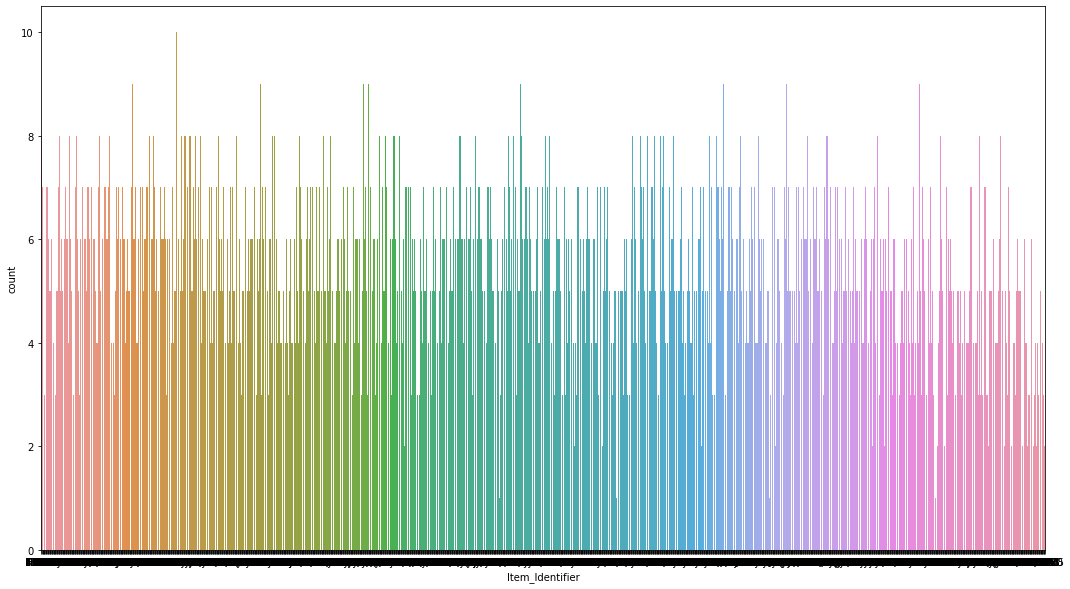

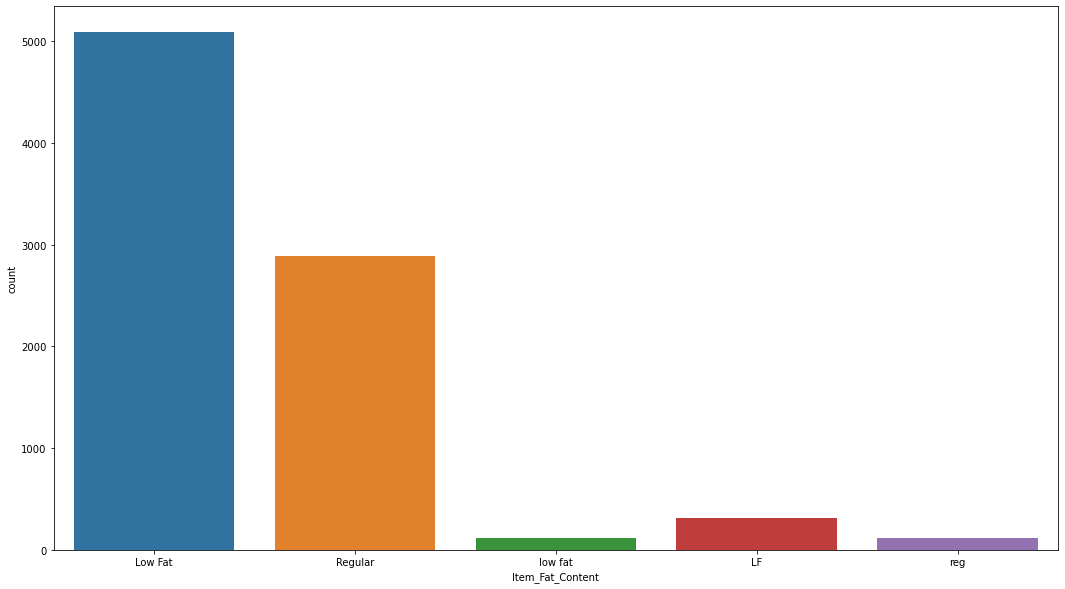

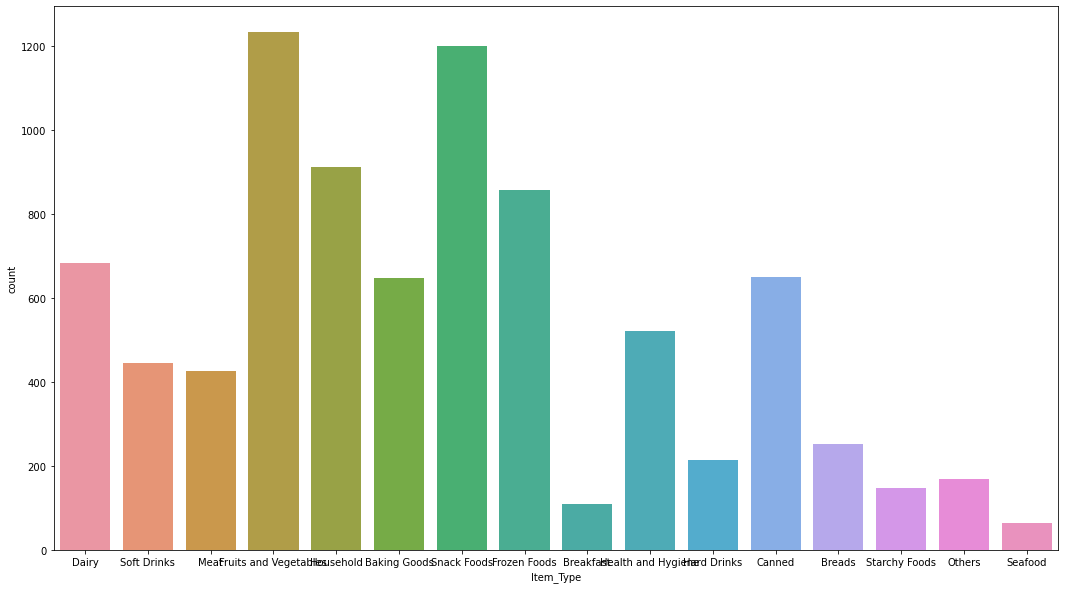

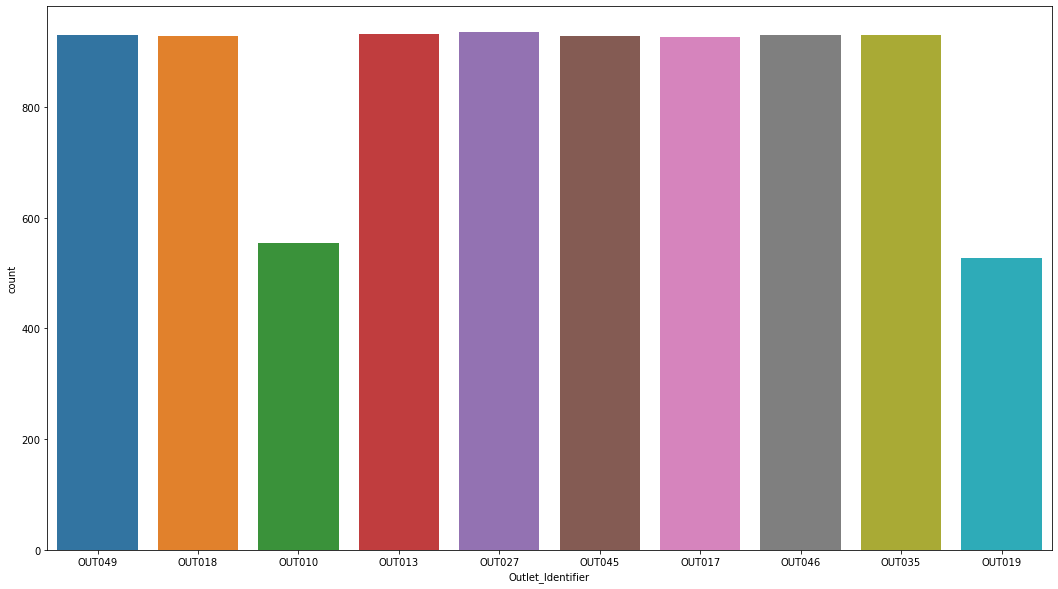

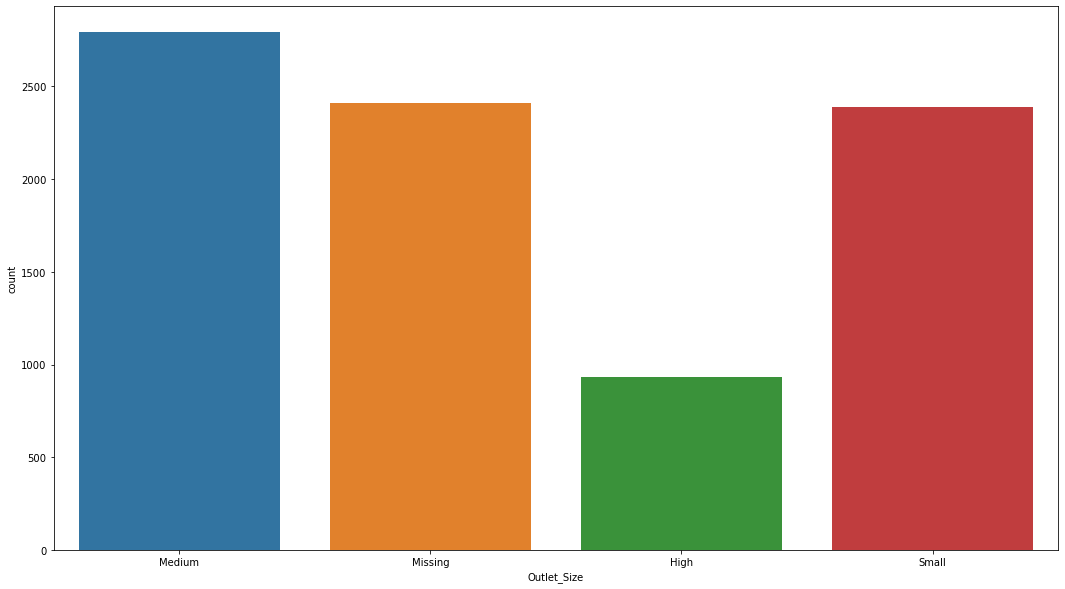

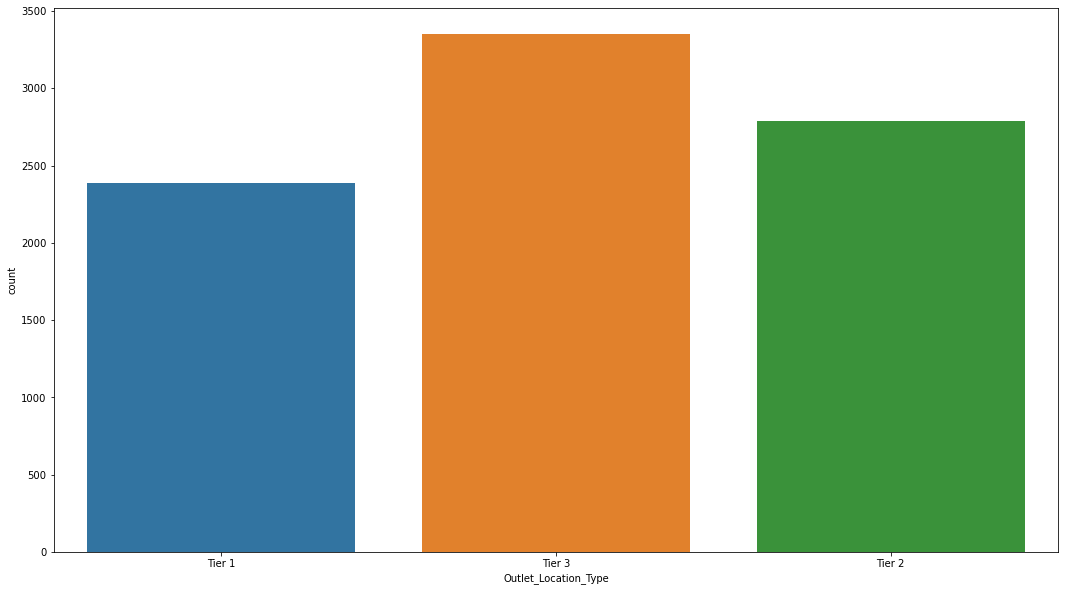

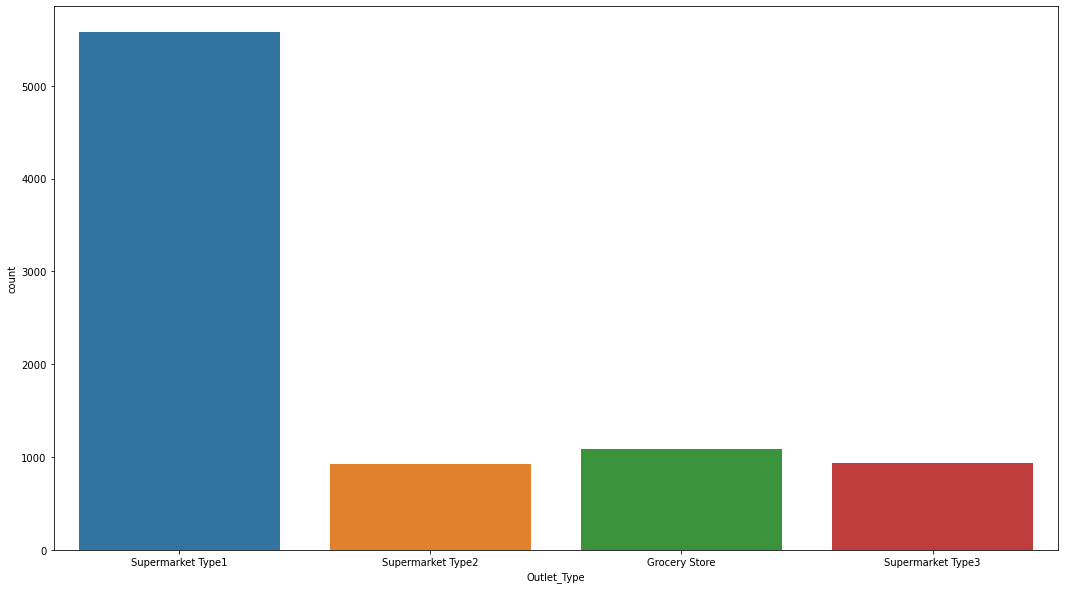

In [19]:
for i in categorical_features:
    plt.figure(figsize = (18,10))
    sns.countplot(df[i])
    plt.show()

Item_type : Seafood has the least count.

Item_Fat_Content : reg has the least count

For other features every category is making valid contribution to the count.

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

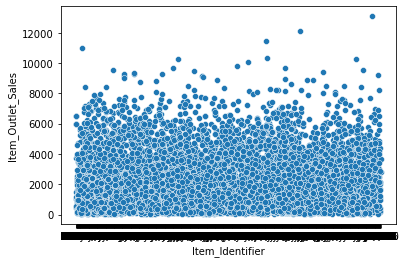

In [21]:
sns.scatterplot(x = 'Item_Identifier', y = 'Item_Outlet_Sales', data = df)

Item_identifier has no relation with target variable, it is just an unique id of products.

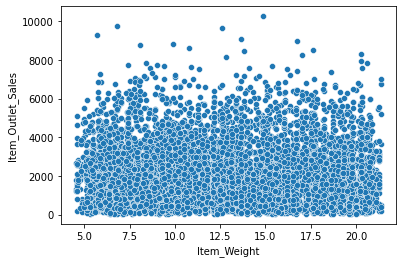

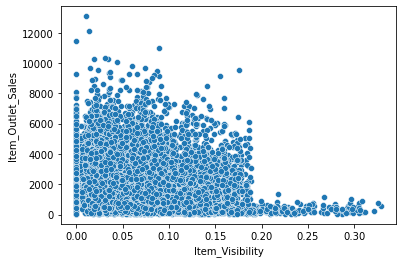

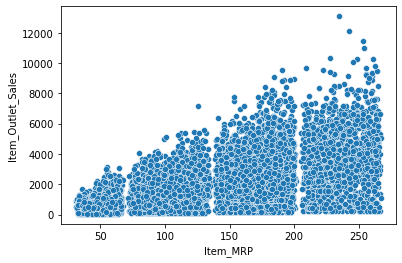

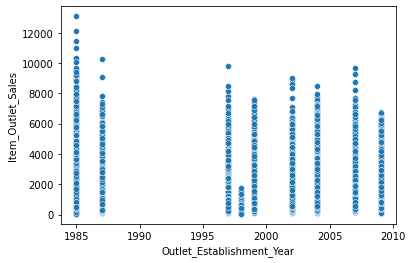

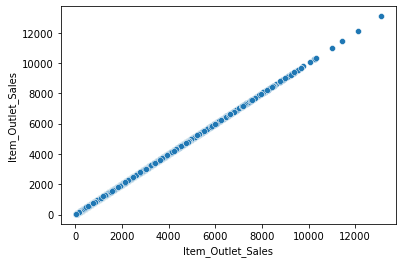

In [22]:
for i in numerical_features:
    sns.scatterplot(x=i, y='Item_Outlet_Sales', data = df)
    plt.show()

Item_weight has no relevant relation with item_sales feature.

Every year sales changes.

As the Item_MRP is increasing Item_Outlet_Sales is also increasing.

<AxesSubplot:>

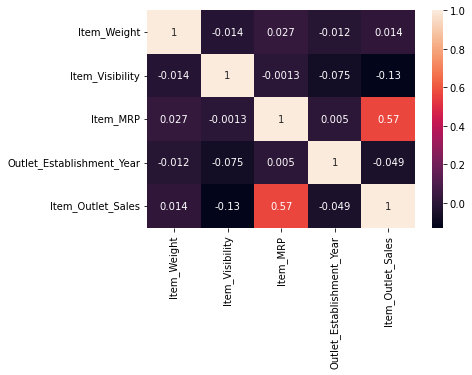

In [23]:
#Checking Correlation
sns.heatmap(df.corr(), annot = True)

Item_Weight has least correlation with Item_Outlet_Sales whereas Item_MRP has maximum correlation with Item_Outlet_sales.

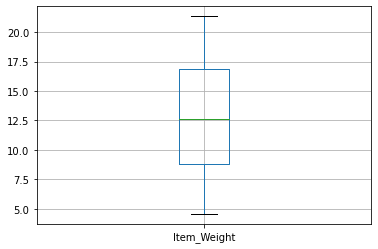

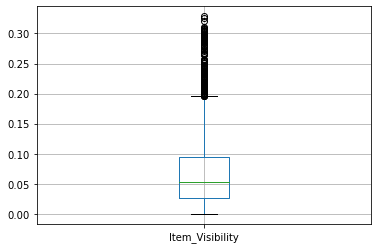

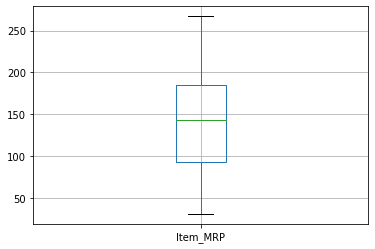

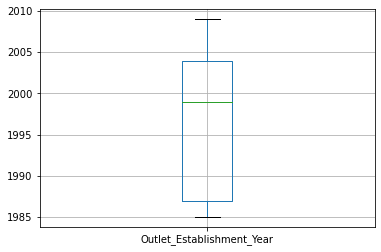

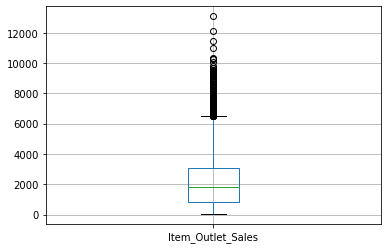

In [24]:
#Checking Outliers by plotting box plot.
for i in numerical_features:
    df.boxplot(i)
    plt.show()

Only Item_Visibility has outliers because Item_Outlet_Sales is our target variable.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

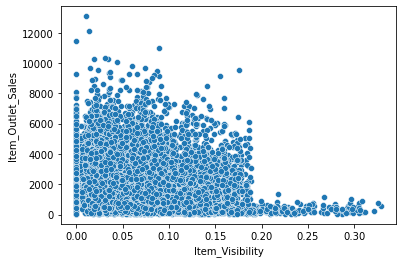

In [25]:
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = df)

In [26]:
#Removing Outliers
df['Item_Visibility'] = np.where(df['Item_Visibility']>0.20, df['Item_Visibility'].median(), df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

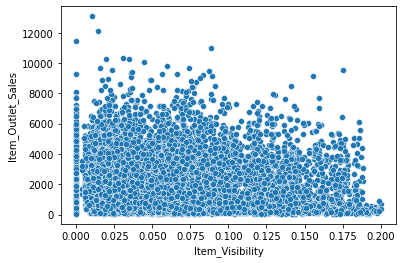

In [27]:
#Plotting to check weather outliers are removed or not.
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = df)

We can see the outliers are removed now.

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder = LabelEncoder()
df['Item_Fat_Content'] = label_encoder.fit_transform(df['Item_Fat_Content'])

In [30]:
df['Item_Type']= label_encoder.fit_transform(df['Item_Type'])

In [31]:
df['Outlet_Identifier']= label_encoder.fit_transform(df['Outlet_Identifier'])

In [32]:
df['Outlet_Size']= label_encoder.fit_transform(df['Outlet_Size'])

In [33]:
df['Outlet_Location_Type']= label_encoder.fit_transform(df['Outlet_Location_Type'])

In [34]:
df['Outlet_Type']= label_encoder.fit_transform(df['Outlet_Type'])

In [35]:
df['Item_Identifier']= label_encoder.fit_transform(df['Item_Identifier'])

In [36]:
df['Item_Weight'] = np.where(df['Item_Weight'].isnull(),df['Item_Weight'].median(),df['Item_Weight'])

In [37]:
x = df.drop('Item_Outlet_Sales', axis = 1)

In [38]:
y = df['Item_Outlet_Sales']

In [39]:
y = df['Item_Outlet_Sales']

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 11)

In [42]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = lr, step = 1)
rfe = rfe.fit(x_train, y_train)
selected_feature = pd.DataFrame({'features':list(x_train.columns), 'ranking':rfe.ranking_})

In [43]:
selected_feature 

,features,ranking
0,Item_Identifier,7
1,Item_Weight,4
2,Item_Fat_Content,2
3,Item_Visibility,1
4,Item_Type,5
5,Item_MRP,3
6,Outlet_Identifier,1
7,Outlet_Establishment_Year,6
8,Outlet_Size,1
9,Outlet_Location_Type,1


In [44]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)
rfe_model = lr.fit(x_train_rfe, y_train)

In [45]:
p = rfe_model.predict(x_test_rfe)

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(p, y_test)

2442867.856234451

In [47]:
df.drop('Item_Identifier', axis = 1, inplace = True)

In [48]:
for i in numerical_features:
    print(i, df[i].skew())

Item_Weight 0.12184549575706366
Item_Visibility 0.7611727090528897
Item_MRP 0.1272022683110526
Outlet_Establishment_Year -0.39664078591550556
Item_Outlet_Sales 1.1775306028542796


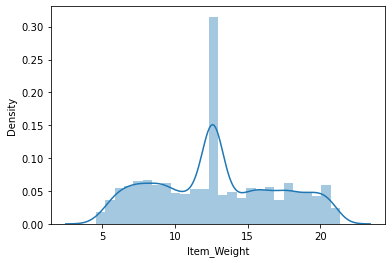

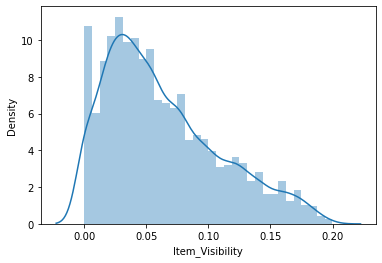

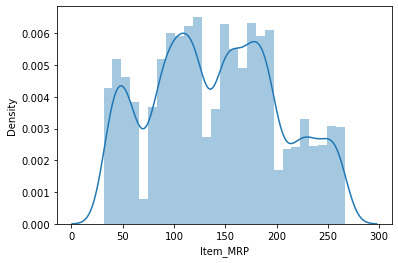

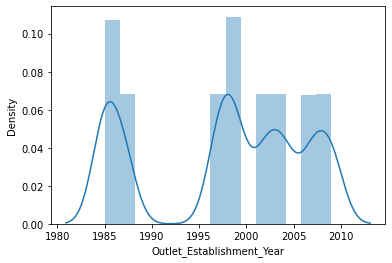

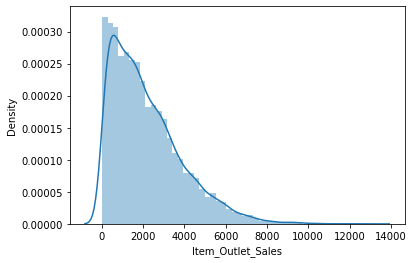

In [49]:
for i in numerical_features:
    sns.distplot(df[i])
    plt.show()

In [50]:
df['Item_MRP'] = np.log(df['Item_MRP'])

In [51]:
df['Item_MRP'].skew()

-0.7357947353046173

In [52]:
df['Item_Visibility'] = np.sqrt(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

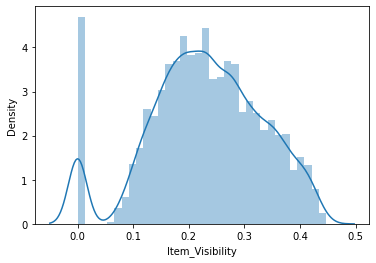

In [53]:
sns.distplot(df['Item_Visibility'])

In [54]:
for i in df['Item_Visibility']:
    if(i<0.1 or i>0.4):
        df['Item_Visibility']  = df['Item_Visibility'].median()
    else:
        pass

In [55]:
df['Item_Visibility'].skew()

0

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [57]:
df_new = pd.DataFrame(sc.fit_transform(df), columns = df.columns)

In [58]:
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.831187,-0.572844,1.0,-0.766479,1.316404,1.507813,0.139541,-0.743350,-1.369334,-0.252658,0.910601
1,-1.630810,0.978092,1.0,1.608963,-1.808494,-0.607071,1.334103,-0.743350,1.091569,1.002972,-1.018440
2,1.108727,-0.572844,1.0,0.658786,0.237521,1.507813,0.139541,-0.743350,-1.369334,-0.252658,-0.049238
3,1.510904,0.978092,1.0,-0.291391,0.715398,-1.664513,0.020085,0.269693,1.091569,-1.508289,-0.849103
4,-0.918719,-0.572844,1.0,0.421242,-1.600117,-1.312032,-1.293934,-1.756393,1.091569,-0.252658,-0.695373


In [59]:
df_new.shape

(8523, 11)

In [61]:
x1 = df_new.drop('Item_Outlet_Sales', axis = 1)
y1 = df_new['Item_Outlet_Sales']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from math import sqrt

In [63]:
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.33, random_state = i)
    lr =  LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r_score = r2_score(y_test, pred)
    print('random_state', i, r_score)

random_state 1 0.47943721004343
random_state 2 0.48948540229724535
random_state 3 0.48712599938515566
random_state 4 0.45895753910707504
random_state 5 0.4765541321814446
random_state 6 0.47320598690009774
random_state 7 0.4626322701016359
random_state 8 0.48794823233100226
random_state 9 0.47985070042223943
random_state 10 0.4726920687442795
random_state 11 0.46942402680746487
random_state 12 0.4860506834184941
random_state 13 0.48336712567091733
random_state 14 0.4745615115251999
random_state 15 0.48348235333685885
random_state 16 0.4807254775957813
random_state 17 0.48182579004195336
random_state 18 0.4701135183847779
random_state 19 0.4790335359951532
random_state 20 0.47696356275027574
random_state 21 0.4847967882626639
random_state 22 0.47516774520280103
random_state 23 0.47054495851965505
random_state 24 0.4734858312814548
random_state 25 0.4902949518757863
random_state 26 0.4708650317509515
random_state 27 0.46951132782417493
random_state 28 0.49591938992974427
random_state 29 

Best rscore is given by random_state 80, so using it for training.

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x1, y1, test_size = 0.33, random_state = 80)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
list_algo = [LinearRegression, SVR, DecisionTreeRegressor, KNeighborsRegressor, AdaBoostRegressor, GradientBoostingRegressor]

In [67]:
for i in list_algo:
    obj = i()
    obj.fit(x_train, y_train)
    pred = obj.predict(x_test)
    print(i,'mean squared error', mean_squared_error(y_test, pred))
    print('rms', np.sqrt(mean_squared_error(y_test, pred)))
    print('---------')

<class 'sklearn.linear_model._base.LinearRegression'> mean squared error 0.4865346899018197
rms 0.6975203867284595
---------
<class 'sklearn.svm._classes.SVR'> mean squared error 0.3799466000365192
rms 0.6163980856853136
---------
<class 'sklearn.tree._classes.DecisionTreeRegressor'> mean squared error 0.8115666294836201
rms 0.9008699292814808
---------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> mean squared error 0.4674736378285915
rms 0.6837204383580994
---------
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> mean squared error 0.4470523431860618
rms 0.6686197298809404
---------
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'> mean squared error 0.38540808679211763
rms 0.6208124409128071
---------


In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
lr = LinearRegression()
for i in range(2, 21):
    lr.fit(x_train, y_train)
    pred = obj.predict(x_test)
    print('r2_score', r2_score(y_test, pred))
    cross_score = cross_val_score(lr, x, y, cv = i)
    print('cv...', i)
    print(cross_score.mean())
    print('-------')

r2_score 0.601604063031099
cv... 2
0.49978165220956383
-------
r2_score 0.601604063031099
cv... 3
0.5000148171121769
-------
r2_score 0.601604063031099
cv... 4
0.49866766186517014
-------
r2_score 0.601604063031099
cv... 5
0.49988077967986155
-------
r2_score 0.601604063031099
cv... 6
0.49945581475570994
-------
r2_score 0.601604063031099
cv... 7
0.5004268307078098
-------
r2_score 0.601604063031099
cv... 8
0.4996144984670658
-------
r2_score 0.601604063031099
cv... 9
0.49984574793568953
-------
r2_score 0.601604063031099
cv... 10
0.49928796026197375
-------
r2_score 0.601604063031099
cv... 11
0.49976350053455487
-------
r2_score 0.601604063031099
cv... 12
0.4992330906571665
-------
r2_score 0.601604063031099
cv... 13
0.49942867854290157
-------
r2_score 0.601604063031099
cv... 14
0.49928709360940954
-------
r2_score 0.601604063031099
cv... 15
0.49930400758794863
-------
r2_score 0.601604063031099
cv... 16
0.4984232646243406
-------
r2_score 0.601604063031099
cv... 17
0.498499422058390

In [70]:
for i in list_algo:
    obj = i()
    obj.fit(x_train, y_train)
    pred = obj.predict(x_test)
    cross_score = cross_val_score(obj, x1, y1, cv = 7)
    print('cross score', cross_score.mean())
    print(i, 'r2_score', r2_score(y_test, pred))
    print('mean squared error', mean_squared_error(y_test, pred))
    print('rms', np.sqrt(mean_squared_error(y_test, pred)))
    print('---------')

cross score 0.47850895388988296
<class 'sklearn.linear_model._base.LinearRegression'> r2_score 0.49706959896806857
mean squared error 0.4865346899018197
rms 0.6975203867284595
---------
cross score 0.5929008089589364
<class 'sklearn.svm._classes.SVR'> r2_score 0.607249596188823
mean squared error 0.3799466000365192
rms 0.6163980856853136
---------
cross score 0.1496852194686334
<class 'sklearn.tree._classes.DecisionTreeRegressor'> r2_score 0.16528091339017104
mean squared error 0.8075069455446549
rms 0.8986139023766853
---------
cross score 0.5037584168755405
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> r2_score 0.5167729885973129
mean squared error 0.4674736378285915
rms 0.6837204383580994
---------
cross score 0.5030677415248002
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> r2_score 0.5167801812928461
mean squared error 0.4674666796175079
rms 0.6837153498478061
---------
cross score 0.5957672254524357
<class 'sklearn.ensemble._gb.GradientBoostingRegress

These are the cross validation score for the models that I have used.

From the above observation, the difference between R2 score and the cross validation score we conclude that SVR is our best fitting model than others.

# Hyper parameter tuning

In [71]:
kernel = ['rbf', 'poly', 'linear']

In [72]:
for i in kernel:
    obj = SVR(kernel = i, C = 1)
    obj.fit(x_train, y_train)
    pred = obj.predict(x_test)
    print(i, 'r_score', r2_score(y_test, pred))

rbf r_score 0.607249596188823
poly r_score 0.6069134899664845
linear r_score 0.4777290786635523


In [73]:
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)
pred = svr.predict(x_test)
print(r2_score(y_test, pred))

0.607249596188823


In [74]:
import pickle
file = 'bigmart.pkl'
fileobj = open(file, 'wb')
pickle.dump(svr, fileobj)

In [75]:
original_res = np.array(y_test)
pred_res = np.array(svr.predict(x_test))
df_comparison = pd.DataFrame({'original':pred_res, 'predicted':pred_res})
df_comparison

,original,predicted
0,0.066779,0.066779
1,0.988805,0.988805
2,-0.848233,-0.848233
3,-0.679658,-0.679658
4,0.009901,0.009901
...,...,...
2808,1.384939,1.384939
2809,-1.146341,-1.146341
2810,0.047218,0.047218
2811,0.056785,0.056785


# Importing Test Dataset.

In [76]:
test_df = pd.read_csv('bigdatamart_Test.csv')
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


This dataset has no target variable, we need to use our past data i.e. trained data to get the sales prediction.

In [77]:
test_df.shape

(5681, 11)

In [78]:
test_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [79]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [80]:
test_df.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [81]:
#Checking count of null values in the dataset.
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

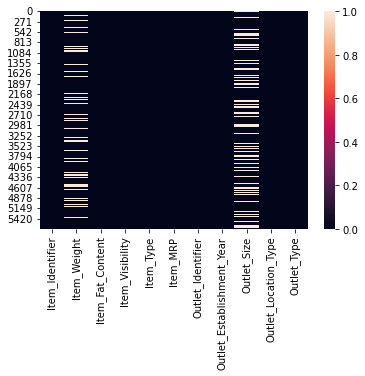

In [82]:
sns.heatmap(test_df.isnull())

#Statistical summary of dataset
test_df.describe()

In [84]:
# Checking value count of Item_Fat_Content
print(test_df["Item_Fat_Content"].value_counts())

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


In [85]:
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].replace('LF','Low Fat')
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].replace('low fat','Low Fat')
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].replace('reg','Regular')

Replaced LF,low fat by Low Fat and reg by Regular.

In [86]:
# Checking value count of Item_Fat_Content
print(test_df["Item_Fat_Content"].value_counts())

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


In [87]:
# Filling missing values in Item_Weight
test_df["Item_Weight"] = test_df["Item_Weight"].fillna(test_df["Item_Weight"].mean())

In [88]:
# Filling missing values in Outlet_Size
test_df["Outlet_Size"] = test_df["Outlet_Size"].fillna(test_df["Outlet_Size"].mode()[0])

In [89]:
#Checking the missing value in our dataset.
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<AxesSubplot:>

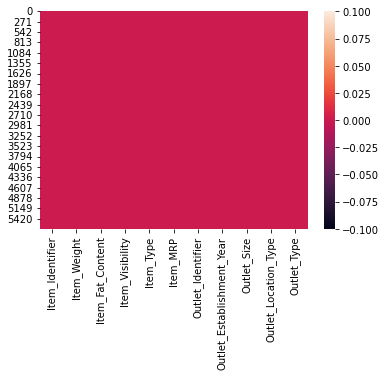

In [90]:
#Visualizing using heat map.
sns.heatmap(test_df.isnull())

<AxesSubplot:>

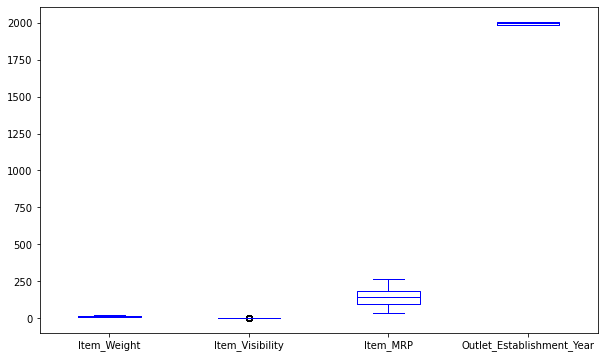

In [91]:
#Identifying the outliers.
test_df.plot(kind = "box", figsize = (10,6), color = "b", vert = True)

Only Item_Visibility has outliers.

In [92]:
#Removing Outliers using zscore method
from scipy.stats import zscore
z=np.abs(zscore(test_df[["Item_Visibility"]]))
new_dff=test_df[(z<3).all(axis=1)]
new_dff

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [93]:
# Dimension of old dataset
test_df.shape

(5681, 11)

In [94]:
# Dimension of new dataset
new_dff.shape

(5600, 11)

In [95]:
#Checking the dataloss
data_loss = (5681-5600)/5681*100
data_loss

1.425805315965499

The dataloss using Zscore is less than 10% so removing outliers and using new dataset.

In [96]:
# Checking the skewness
new_dff.skew()

Item_Weight                  0.140901
Item_Visibility              0.787861
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
dtype: float64

In [97]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [98]:
new_dff[['Item_Visibility']] = scaler.fit_transform(new_dff[['Item_Visibility']].values)

In [99]:
new_dff.skew()

Item_Weight                  0.140901
Item_Visibility              0.105676
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
dtype: float64

# Label Encoding

In [100]:
#checking for the categorical variables
cat_cols=[]
for x in test_df.dtypes.index:
    if test_df.dtypes[x]=='object':
        cat_cols.append(x)
print(cat_cols)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [101]:
from sklearn.preprocessing import LabelEncoder
columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
LE=LabelEncoder()
new_dff[columns]= new_dff[columns].apply(LE.fit_transform)

In [102]:
new_dff[columns].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1102,0,13,9,1,0,1
1,1066,1,4,2,1,1,1
2,1405,0,11,0,1,2,0
3,809,0,13,2,1,1,1
4,1183,1,4,5,1,2,3


In [103]:
# Dataset after cleaning and encoding
new_dff.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1102,20.750000,0,-1.453107,13,107.8622,9,1999,1,0,1
1,1066,8.300000,1,-0.440632,4,87.3198,2,2007,1,1,1
2,1405,14.600000,0,0.926222,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,-1.170062,13,155.0340,2,2007,1,1,1
4,1183,12.695633,1,1.229130,4,234.2300,5,1985,1,2,3


In [104]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
new_dff = pd.DataFrame(mms.fit_transform(new_dff), columns=new_dff.columns)
new_dff.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.715120,0.964275,0.0,0.073469,0.866667,0.323413,1.000000,0.583333,0.5,0.0,0.333333
1,0.691759,0.222983,1.0,0.327372,0.266667,0.235849,0.222222,0.916667,0.5,0.5,0.333333
2,0.911746,0.598095,0.0,0.670144,0.733333,0.894140,0.000000,0.541667,0.5,1.0,0.000000
3,0.524984,0.164335,0.0,0.144449,0.866667,0.524488,0.222222,0.916667,0.5,0.5,0.333333
4,0.767683,0.484706,1.0,0.746106,0.266667,0.862069,0.555556,0.000000,0.5,1.0,1.000000


In [105]:
new_dff.shape

(5600, 11)

Now let's load our saved model again and use the TEST data for predicting the values.

# Loading the saved trained model.

In [106]:
file = 'bigmart.pkl'
fileobj = open(file, 'rb')
bigmart = pickle.load(fileobj)

In [107]:
# Predicting the saved model 
Prediction = bigmart.predict(x_test)

In [108]:
pred = pd.DataFrame(Prediction)

In [109]:
pred

,0
0,0.066779
1,0.988805
2,-0.848233
3,-0.679658
4,0.009901
...,...
2808,1.384939
2809,-1.146341
2810,0.047218
2811,0.056785
